# 와인 품질 분류 데이터
* [데이터 출처](https://dacon.io/competitions/open/235610/data)

## 데이터 해석
* index 구분자
* quality 품질
* fixed acidity 산도
* volatile acidity 휘발성산
* citric acid 시트르산
* residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분
* chlorides 염화물
* free sulfur dioxide 독립 이산화황
* total sulfur dioxide 총 이산화황
* density 밀도
* pH 수소이온농도
* sulphates 황산염
* alcohol 도수
* type 종류

# load data & library 

In [560]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [561]:
# df = pd.read_csv("../data/MiniP3/WineQT.csv")
# df.shape

In [562]:
train = pd.read_csv("../data/MiniP3/train.csv", index_col="index")
print(train.shape)
train.head()

(5497, 13)


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,,
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [563]:
test = pd.read_csv("../data/MiniP3/test.csv", index_col="index")
print(test.shape)
test.head()

(1000, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


# 데이터 타입과 결측치 조회

In [564]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 601.2+ KB


In [565]:
train.isnull().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [566]:
test.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

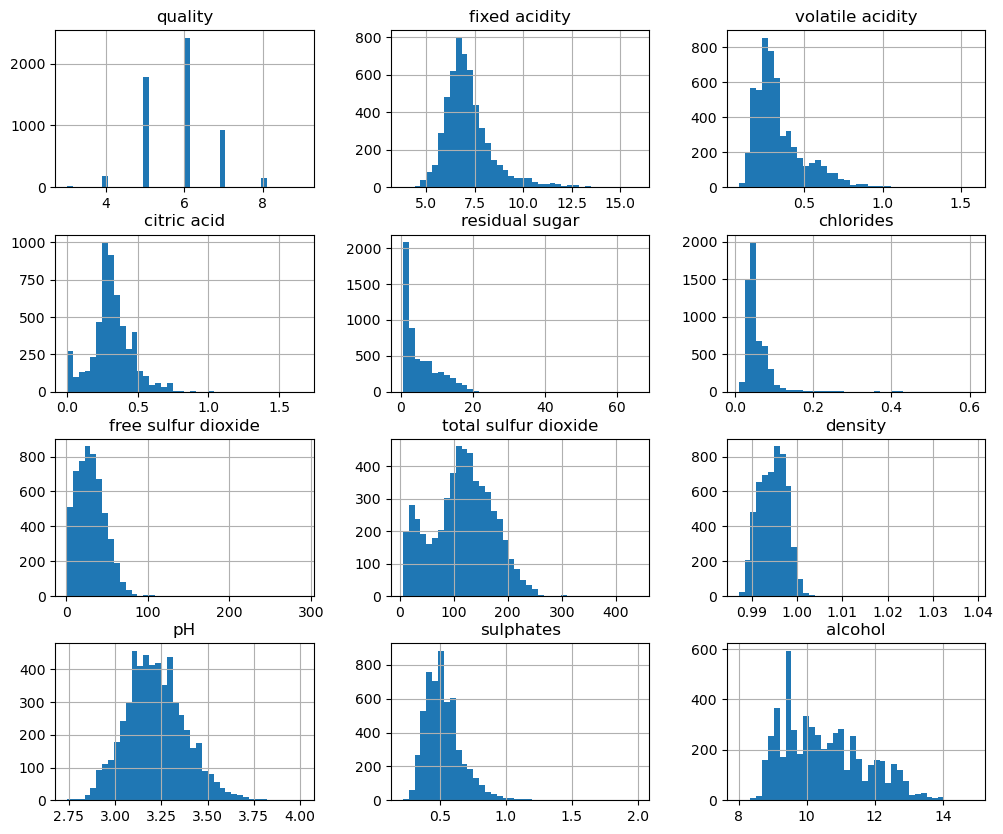

In [567]:
train.hist(figsize=(12, 10), bins=40);

# 와인 등급에 영향을 끼치는 요소
* 관련 지식 전무
* 상관계수를 이용하여 확인해보자

In [539]:
train.corr()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,1.000000,-0.076506,-0.261557,0.079157,-0.032848,-0.198148,0.055574,-0.039732,-0.299831,0.017931,0.042068,0.439615
fixed acidity,-0.076506,1.000000,0.210180,0.326992,-0.112544,0.303307,-0.277079,-0.323845,0.452161,-0.250462,0.300979,-0.096274
volatile acidity,-0.261557,0.210180,1.000000,-0.377986,-0.192677,0.385431,-0.352572,-0.418535,0.266759,0.264130,0.225174,-0.032897
citric acid,0.079157,0.326992,-0.377986,1.000000,0.135160,0.029121,0.129496,0.190955,0.088400,-0.322100,0.049013,-0.005376
residual sugar,-0.032848,-0.112544,-0.192677,0.135160,1.000000,-0.130339,0.396018,0.494788,0.557183,-0.259673,-0.182275,-0.361457
chlorides,-0.198148,0.303307,0.385431,0.029121,-0.130339,1.000000,-0.193143,-0.281654,0.364200,0.046937,0.400354,-0.259774
free sulfur dioxide,0.055574,-0.277079,-0.352572,0.129496,0.396018,-0.193143,1.000000,0.716829,0.027270,-0.145586,-0.189390,-0.182321
total sulfur dioxide,-0.039732,-0.323845,-0.418535,0.190955,0.494788,-0.281654,0.716829,1.000000,0.039707,-0.234412,-0.272236,-0.271566
density,-0.299831,0.452161,0.266759,0.088400,0.557183,0.364200,0.027270,0.039707,1.000000,0.020047,0.261879,-0.688053
pH,0.017931,-0.250462,0.264130,-0.322100,-0.259673,0.046937,-0.145586,-0.234412,0.020047,1.000000,0.187392,0.114959


In [540]:
mask_train = np.triu(np.ones_like(train.corr()))
mask_train

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

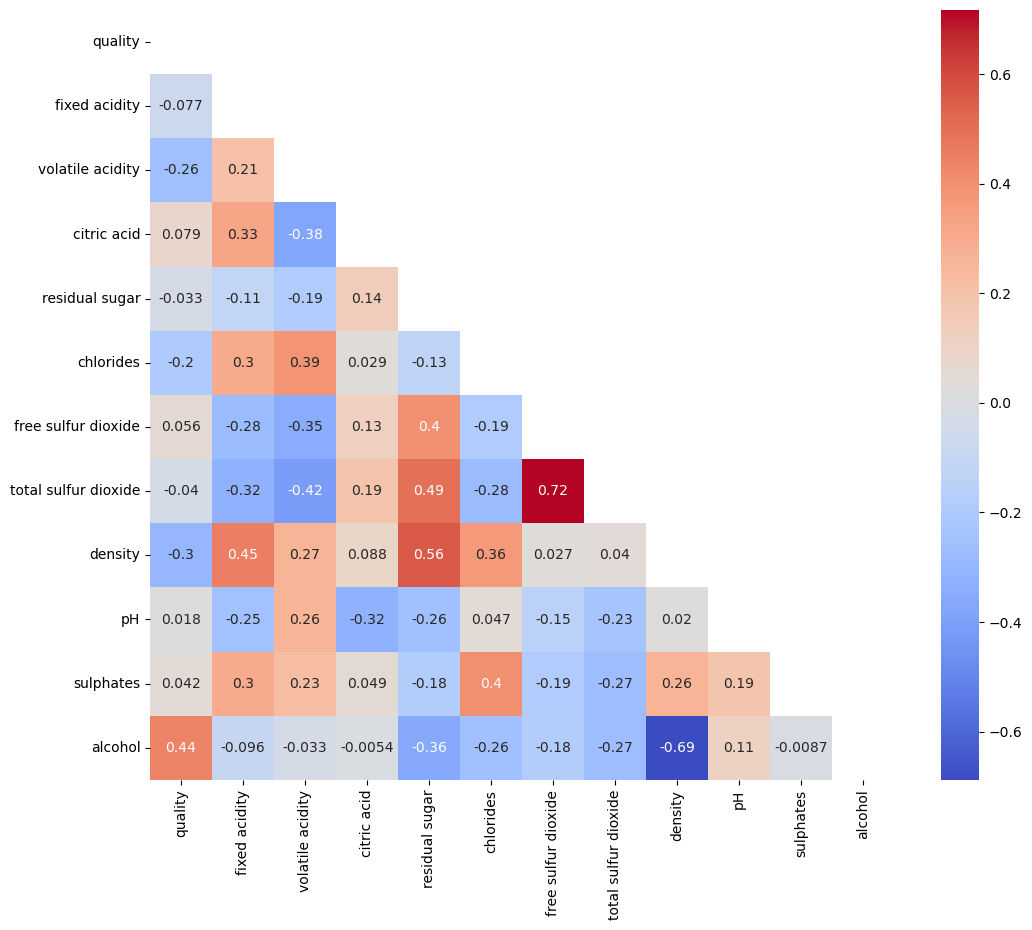

In [541]:
plt.figure(figsize=(12, 10))
sns.heatmap(train.corr(), mask=mask_train, cmap='coolwarm', annot=True)

In [542]:
mask_test = np.triu(np.ones_like(test.corr()))
mask_test

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

<AxesSubplot:>

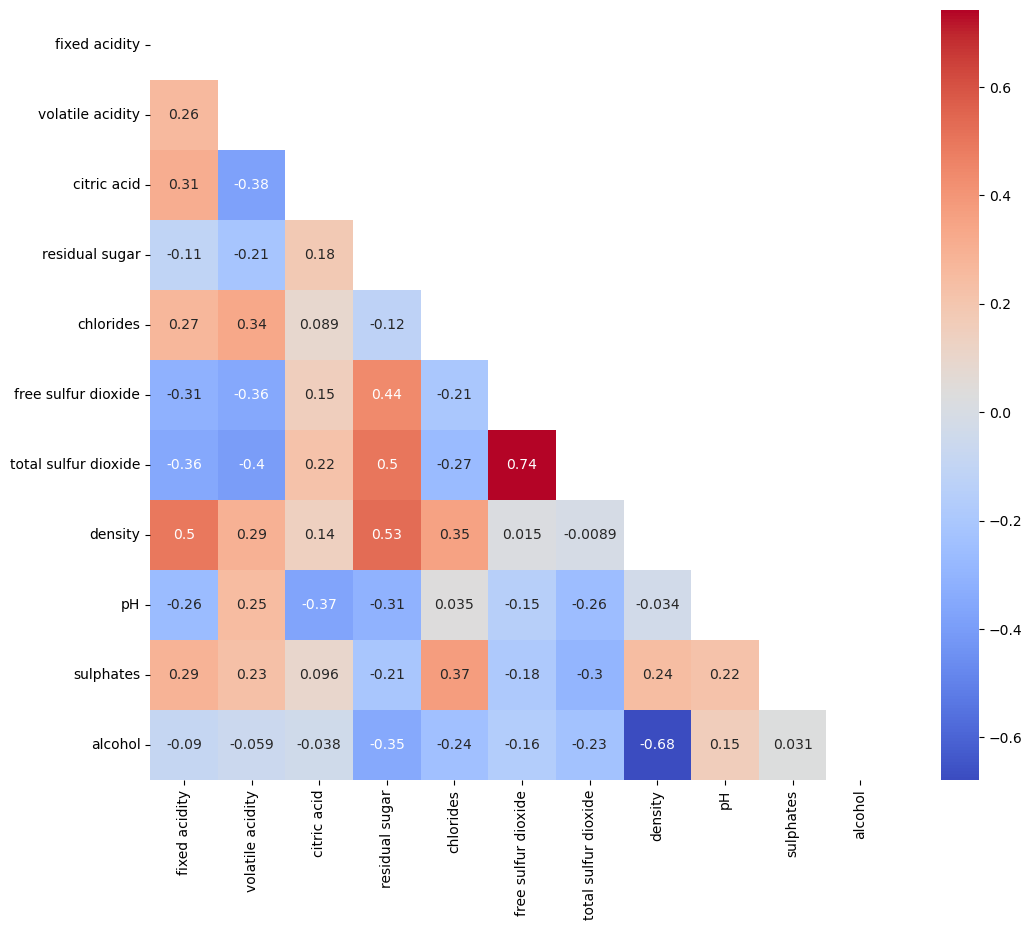

In [543]:
plt.figure(figsize=(12, 10))
sns.heatmap(test.corr(), mask=mask_test, cmap='coolwarm', annot=True)

In [570]:
# 'volatile acidity'
# 'chlorides',
# 'fixed acidity', 
cols = train.columns.tolist()
cols.remove('quality')
cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

# 파생변수

## sulfur dioxide
* dioxide = total sulfur dioxide + free sulfur dioxide

In [545]:
# train["dioxide"] = train["total sulfur dioxide"] + train['free sulfur dioxide']
# test["dioxide"] = test["total sulfur dioxide"] + test['free sulfur dioxide']

# featrues & label
* features로 quality와 상관계수 |0.1|보다 큰 것만 사용하자 

In [378]:
feature_names = ["volatile acidity", "chlorides", "density", "alcohol", "total sulfur dioxide"]
feature_names

['volatile acidity', 'chlorides', 'density', 'alcohol', 'total sulfur dioxide']

In [571]:
label = 'quality'
label

'quality'

# train & test

In [572]:
X_train = train[cols]

# type의 [white, red]를 one-hot-encoding
X_train = pd.get_dummies(data=X_train, columns=["type"], prefix='type')
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
index,,,,,,,,,,,,,
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0,1
1,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1,0
2,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0,1
3,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0,1
4,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0,1


In [573]:
y_train = train[label]
y_train.head()

index
0    5
1    5
2    5
3    6
4    6
Name: quality, dtype: int64

In [574]:
X_test = test[cols]
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
index,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [575]:
X_test = pd.get_dummies(data=X_test, columns=["type"], prefix='type')
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
index,,,,,,,,,,,,,
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0,1
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1,0
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0,1
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0,1
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0,1


In [576]:
X_train.shape, X_test.shape

((5497, 13), (1000, 13))

# ML
* 일단 하이퍼 파라미터 설정 없이 진행 

In [577]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)
model

DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)

In [578]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, max_features=0.7, min_samples_leaf=3)

In [579]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train, cv=5)

In [580]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.551209750773149

<AxesSubplot:>

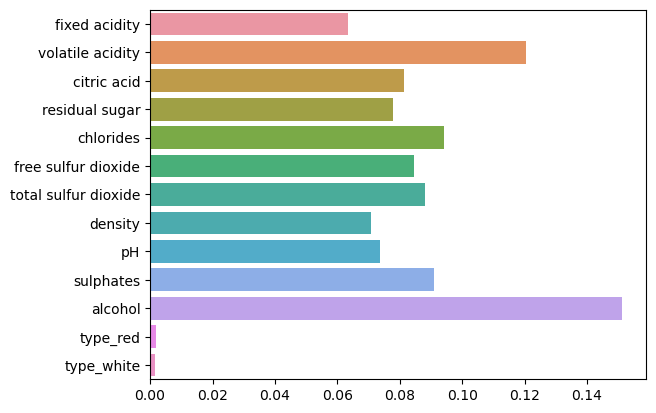

In [581]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

# Random Forest

In [619]:
from sklearn.ensemble import RandomForestClassifier

Forest_model = RandomForestClassifier(n_jobs=-1, max_features=0.8, max_depth=10, min_samples_leaf=3,
                                      n_estimators=500)

In [620]:
y_valid_predict = cross_val_predict(Forest_model, unskew_data, y_train, cv=5)

In [621]:
score = (y_train == y_valid_predict).mean()
score

0.629070402037475

In [622]:
Forest_model.fit(unskew_data, y_train)

RandomForestClassifier(max_depth=10, max_features=0.8, min_samples_leaf=3,
                       n_estimators=500, n_jobs=-1)

In [623]:
y_predict = Forest_model.predict(X_test)
y_predict[:5]

array([6, 6, 6, 6, 6])

# GridSearch

In [358]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(3, 10, 2))
max_features = [0.3, 0.5, 0.7, 0.8, 0.9]
min_samples_leaf = [1, 2, 3, 4, 5]

parameters = {"max_depth":max_depth, "max_features":max_features, "min_samples_leaf":min_samples_leaf}

In [359]:
parameters

{'max_depth': [3, 5, 7, 9],
 'max_features': [0.3, 0.5, 0.7, 0.8, 0.9],
 'min_samples_leaf': [1, 2, 3, 4, 5]}

In [360]:
clf = GridSearchCV(Forest_model, parameters, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='log_loss',
                                              max_depth=10, max_features=0.7,
                                              min_samples_leaf=3,
                                              n_estimators=500, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'max_features': [0.3, 0.5, 0.7, 0.8, 0.9],
                         'min_samples_leaf': [1, 2, 3, 4, 5]})

In [361]:
clf.best_estimator_

RandomForestClassifier(criterion='log_loss', max_depth=9, max_features=0.9,
                       n_estimators=500, n_jobs=-1)

# 똑같은 데이터 셋으로 다른 모델
* 마찬가지로 하이퍼 파라미터 설정 X
* 3~7점 정도의 성능 향상을 보임

## XGBoost

In [587]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_XGB = le.fit_transform(y_train)

In [588]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train_XGB)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [589]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, X_train, y_train_XGB, cv=5, n_jobs=-1)

In [590]:
valid_accuracy = (y_train_XGB == y_valid_predict).mean()
valid_accuracy

0.6490813170820448

In [591]:
y_predict = model.predict(X_test)
y_predict[:5]

array([2, 3, 3, 2, 3])

/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jahyeon_gu/.pyenv/versions/anaconda3-2022.05/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy versio

## LGBM

In [459]:
from lightgbm import LGBMClassifier
import lightgbm as lgb

In [461]:
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

In [465]:
temp_train = lgb.Dataset(X_train, label=y_train)

In [596]:
lgb.train(params, temp_train, 100)

TypeError: Training only accepts Dataset object

In [472]:
y_predict = clf.predict(X_test)
y_predict[:5]

array([6, 5, 5, 6, 6])

In [603]:
model = LGBMClassifier(max_depth=10, learning_rate=0.003, reg_lambda=0.2, n_estimators=500, 
                       reg_alpha=0.9)
model.fit(unskew_data, y_train)

LGBMClassifier(learning_rate=0.003, max_depth=10, n_estimators=500,
               reg_alpha=0.9, reg_lambda=0.2)

In [604]:
from sklearn.model_selection import cross_val_predict

y_valid_predict = cross_val_predict(model, unskew_data, y_train, cv=5, n_jobs=-1)

In [605]:
valid_accuracy = (y_train == y_valid_predict).mean()
valid_accuracy

0.5950518464617064

In [601]:
y_predict = model.predict(X_test)
y_predict[:5]

array([6, 6, 6, 6, 6])

# GridSearch

In [160]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(3, 10, 2))
feature_fraction = [0.3, 0.5, 0.7, 0.8, 0.9]
reg_lambda = [0.2, 0.4, 0.6]
reg_alpha=[0.5, 0.7, 0.9]

parameters = {"max_depth":max_depth, "feature_fraction":feature_fraction, 
              "reg_lambda":reg_lambda, "reg_alpha":reg_alpha}

In [161]:
parameters

{'max_depth': [3, 5, 7, 9],
 'feature_fraction': [0.3, 0.5, 0.7, 0.8, 0.9],
 'reg_lambda': [0.2, 0.4, 0.6],
 'reg_alpha': [0.5, 0.7, 0.9]}

In [162]:
clf = GridSearchCV(model, parameters, n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8


GridSearchCV(cv=5,
             estimator=LGBMClassifier(feature_fraction=0.8, max_depth=9,
                                      n_estimators=500, reg_alpha=0.9,
                                      reg_lambda=0.2),
             n_jobs=-1,
             param_grid={'feature_fraction': [0.3, 0.5, 0.7, 0.8, 0.9],
                         'max_depth': [3, 5, 7, 9],
                         'reg_alpha': [0.5, 0.7, 0.9],
                         'reg_lambda': [0.2, 0.4, 0.6]})

In [163]:
clf.best_estimator_

LGBMClassifier(feature_fraction=0.8, max_depth=9, n_estimators=500,
               reg_alpha=0.5, reg_lambda=0.2)

# 측정 지표의 표준화
* 두 표준화 점수에 긍정적 영향 X

## StandardScaler
[참고 블로그](https://data-marketing-bk.tistory.com/28) <br>
위 블로그 따라 표준화 후 모델 재실행

In [216]:
from sklearn.preprocessing import StandardScaler

In [217]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.fit_transform(X_test)

## MinMaxScaler()
[참고 블로그](https://www.geeksforgeeks.org/wine-quality-prediction-machine-learning/) <br>

In [315]:
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler()
X_train = norm.fit_transform(X_train)
X_test = norm.fit_transform(X_test)

In [594]:
from sklearn import preprocessing

In [592]:
scaler = MinMaxScaler()

In [593]:
scaled_data = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0.148760,0.410000,0.036145,0.095092,0.054908,0.027778,0.179724,0.139001,0.551181,0.123596,0.318841,0.0,1.0
1,0.413223,0.353333,0.084337,0.027607,0.096506,0.031250,0.082949,0.188741,0.354331,0.207865,0.217391,1.0,0.0
2,0.338843,0.086667,0.234940,0.021472,0.079867,0.069444,0.304147,0.089647,0.244094,0.168539,0.420290,0.0,1.0
3,0.264463,0.086667,0.186747,0.082822,0.061564,0.097222,0.235023,0.130904,0.409449,0.157303,0.405797,0.0,1.0
4,0.330579,0.213333,0.156627,0.136503,0.083195,0.107639,0.396313,0.161751,0.236220,0.117978,0.420290,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.322314,0.046667,0.174699,0.010736,0.033278,0.031250,0.133641,0.117409,0.480315,0.095506,0.304348,0.0,1.0
5493,0.206612,0.066667,0.216867,0.009202,0.041597,0.086806,0.241935,0.069983,0.330709,0.162921,0.434783,0.0,1.0
5494,0.330579,0.046667,0.204819,0.007669,0.043261,0.104167,0.200461,0.074224,0.259843,0.280899,0.478261,0.0,1.0
5495,0.231405,0.220000,0.186747,0.015337,0.054908,0.059028,0.218894,0.093310,0.307087,0.106742,0.362319,0.0,1.0


In [595]:
normalized_arr = preprocessing.normalize(scaled_data)
normalized_data = pd.DataFrame(normalized_arr, columns=X_train.columns)
normalized_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
0,0.114883,0.316631,0.027913,0.073437,0.042404,0.021452,0.138795,0.107347,0.425661,0.095449,0.246231,0.000000,0.772270
1,0.329548,0.281786,0.067260,0.022017,0.076964,0.024922,0.066153,0.150522,0.282581,0.165774,0.173371,0.797507,0.000000
2,0.271783,0.069515,0.188443,0.017223,0.064061,0.055701,0.243954,0.071905,0.195786,0.135184,0.337111,0.000000,0.802092
3,0.211613,0.069347,0.149428,0.066271,0.049261,0.077794,0.188057,0.104745,0.327626,0.125868,0.324704,0.000000,0.800163
4,0.257663,0.166279,0.122080,0.106395,0.064845,0.083897,0.308899,0.126073,0.184118,0.091955,0.327587,0.000000,0.779431
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5492,0.262916,0.038067,0.142504,0.008758,0.027145,0.025491,0.109012,0.095772,0.391800,0.077905,0.248261,0.000000,0.815714
5493,0.169155,0.054581,0.177552,0.007534,0.034056,0.071069,0.198076,0.057296,0.270755,0.133386,0.355962,0.000000,0.818712
5494,0.262410,0.037044,0.162584,0.006087,0.034340,0.082687,0.159124,0.058918,0.206261,0.222975,0.379639,0.000000,0.793790
5495,0.193029,0.183515,0.155777,0.012794,0.045802,0.049239,0.182592,0.077836,0.256159,0.089039,0.302232,0.000000,0.834159


In [602]:
unskew_data = normalized_data.copy(deep=True)
unskew_data['residual sugar'] = unskew_data['residual sugar'].replace(0.0, 0.01).apply(np.log)
unskew_data['chlorides'] = unskew_data['chlorides'].replace(0.0, 0.01).apply(np.log)
unskew_data['total sulfur dioxide'] = unskew_data['total sulfur dioxide'].replace(0.0, 0.01).apply(np.log)
unskew_data['free sulfur dioxide'] = unskew_data['free sulfur dioxide'].replace(0.0, 0.01).apply(np.log)

# feature 재지정하기 위해 시각화

In [219]:
X_train.describe()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,7.210115,0.318543,5.438075,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.243405,0.756595
std,1.287579,0.145104,4.756676,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177,0.429177
min,3.800000,0.000000,0.600000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000,0.000000
25%,6.400000,0.250000,1.800000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,0.000000,1.000000
50%,7.000000,0.310000,3.000000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,0.000000,1.000000
75%,7.700000,0.390000,8.100000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,0.000000,1.000000
max,15.900000,1.660000,65.800000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


In [124]:
col_list = cols
col_list

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type',
 'dioxide']

<AxesSubplot:xlabel='quality', ylabel='dioxide'>

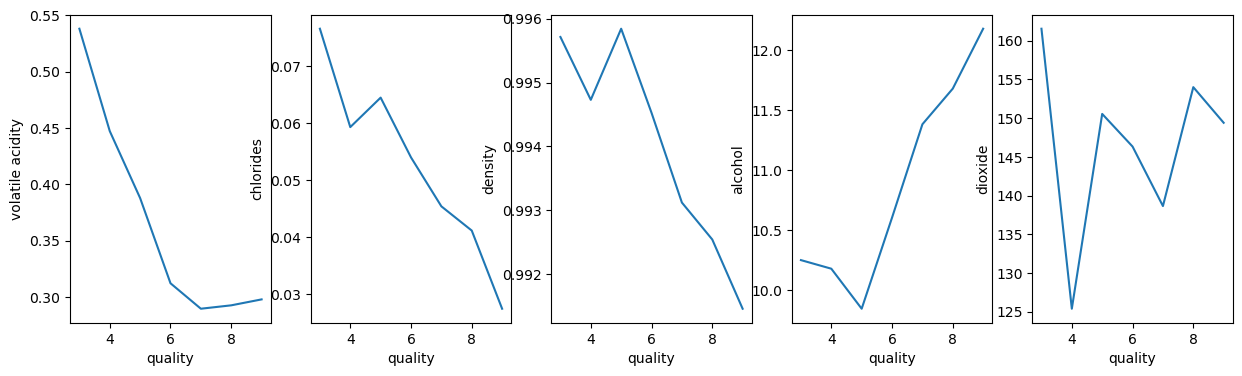

In [600]:
fig, ax = plt.subplots(1, 5, figsize=(15, 4))
sns.lineplot(data=train, x="quality", y=col_list[0], errorbar=None, ax=ax[0])
sns.lineplot(data=train, x="quality", y=col_list[1], errorbar=None, ax=ax[1])
sns.lineplot(data=train, x="quality", y=col_list[2], errorbar=None, ax=ax[2])
sns.lineplot(data=train, x="quality", y=col_list[3], errorbar=None, ax=ax[3])
sns.lineplot(data=train, x="quality", y=col_list[4], errorbar=None, ax=ax[4])
# sns.lineplot(data=train, x="quality", y=col_list[5], errorbar=None, ax=ax[1, 1])
# sns.lineplot(data=train, x="quality", y=col_list[6], errorbar=None, ax=ax[1, 2])
# sns.lineplot(data=train, x="quality", y=col_list[8], errorbar=None, ax=ax[1, 3])
# sns.lineplot(data=train, x="quality", y=col_list[9], errorbar=None, ax=ax[2, 0])
# sns.lineplot(data=train, x="quality", y=col_list[10], errorbar=None, ax=ax[2, 1])
# sns.lineplot(data=train, x="quality", y=col_list[11], errorbar=None, ax=ax[2, 2])
# sns.lineplot(data=train, x="quality", y=col_list[12], errorbar=None, ax=ax[2, 3])

<AxesSubplot:xlabel='dioxide'>

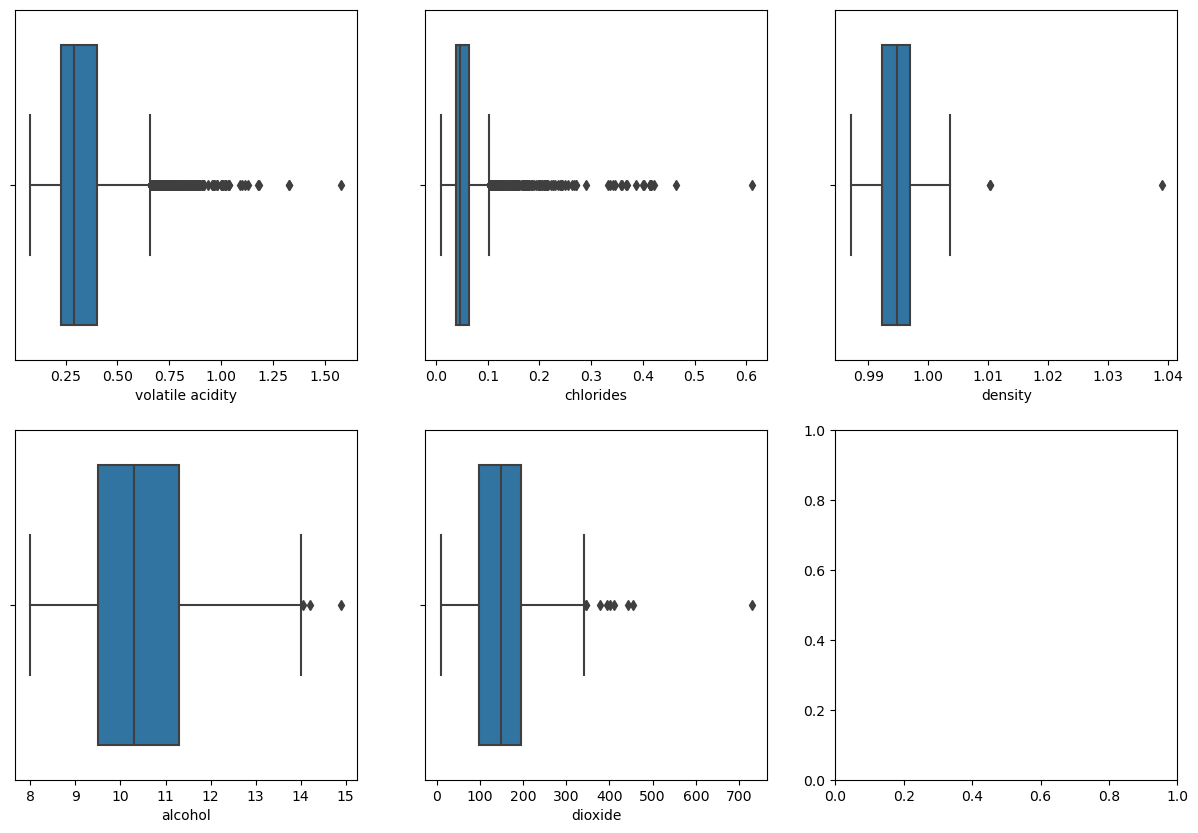

In [603]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
sns.boxplot(data=X_train, x=col_list[0], ax=ax[0, 0])
sns.boxplot(data=X_train, x=col_list[1], ax=ax[0, 1])
sns.boxplot(data=X_train, x=col_list[2], ax=ax[0, 2])
sns.boxplot(data=X_train, x=col_list[3], ax=ax[1, 0])
sns.boxplot(data=X_train, x=col_list[4], ax=ax[1, 1])
# sns.boxplot(data=train, x=col_list[6], ax=ax[5])
# sns.boxplot(data=train, x=col_list[7], ax=ax[6])
# sns.boxplot(data=train, x=col_list[8], ax=ax[7])
# sns.boxplot(data=train, x=col_list[9], ax=ax[8])
# sns.boxplot(data=train, x=col_list[10], ax=ax[9])
# sns.boxplot(data=train, x=col_list[11], ax=ax[10])
# sns.boxplot(data=train, x=col_list[12], ax=ax[11])

# 전처리
* 3분위수 이상의 값을 전부 중앙값으로 대체해보자

In [483]:
cols

['fixed acidity',
 'citric acid',
 'chlorides',
 'volatile acidity',
 'residual sugar',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

<AxesSubplot:>

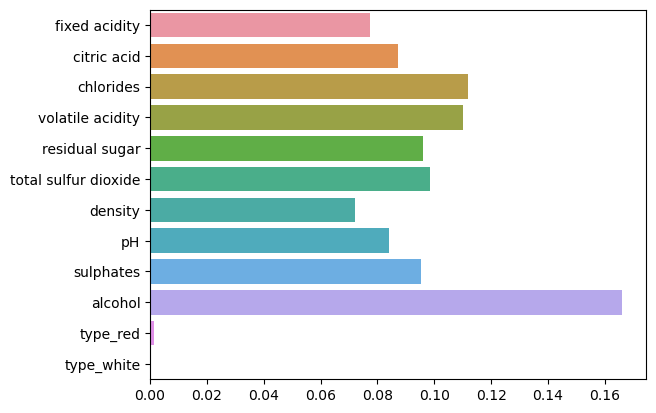

In [517]:
sns.barplot(x=model.feature_importances_, y=model.feature_names_in_)

In [485]:
cols

['fixed acidity',
 'citric acid',
 'chlorides',
 'volatile acidity',
 'residual sugar',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'type']

<AxesSubplot:xlabel='alcohol'>

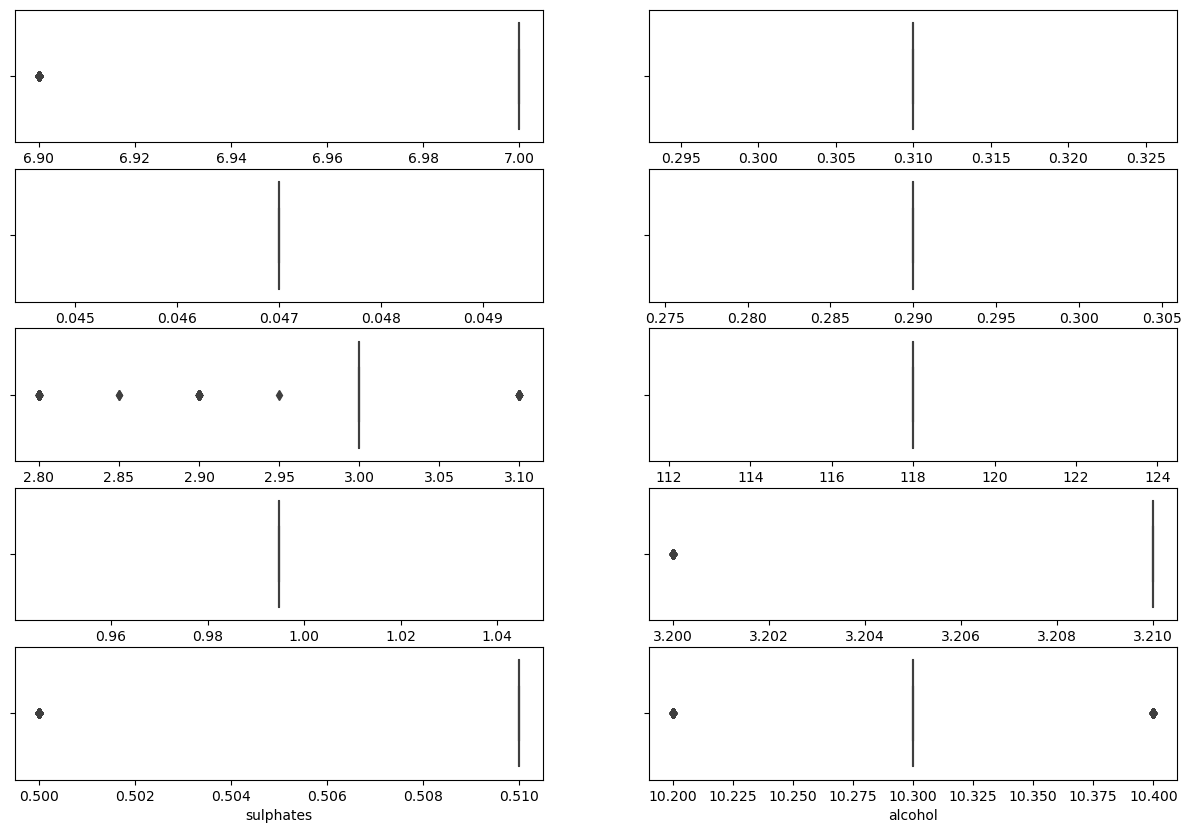

In [521]:
fig, ax = plt.subplots(5, 2, figsize=(15, 10))
sns.boxplot(data=X_train, x=cols[0], ax=ax[0, 0])
sns.boxplot(data=X_train, x=cols[1], ax=ax[0, 1])
sns.boxplot(data=X_train, x=cols[2], ax=ax[1, 0])
sns.boxplot(data=X_train, x=cols[3], ax=ax[1, 1])
sns.boxplot(data=X_train, x=cols[4], ax=ax[2, 0])
sns.boxplot(data=X_train, x=cols[5], ax=ax[2, 1])
sns.boxplot(data=X_train, x=cols[6], ax=ax[3, 0])
sns.boxplot(data=X_train, x=cols[7], ax=ax[3, 1])
sns.boxplot(data=X_train, x=cols[8], ax=ax[4, 0])
sns.boxplot(data=X_train, x=cols[9], ax=ax[4, 1])

In [520]:
for col in cols:
    if col == "type":
        continue
#     ['fixed acidity', 'chlorides', 'sulphates', 'citric acid', 'volatile acidity', '']:
    condition = X_train[col].describe()["75%"] < X_train[col]
    median = X_train[col].describe()["50%"]
    X_train.loc[condition, col] = median

    condition = X_train[col].describe()["25%"] > X_train[col]
    X_train.loc[condition, col] = median

In [576]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,dioxide
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,6.747808,0.268050,0.271110,3.084182,0.043616,24.230853,98.550755,0.993764,3.165114,0.478081,10.036598,124.316718
std,0.870311,0.567499,0.061042,0.088068,1.768289,0.008760,9.665381,38.360809,0.002010,0.097437,0.070768,0.649500,46.782456
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,9.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,98.000000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,148.000000
75%,6.000000,7.000000,0.290000,0.310000,3.100000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.400000,148.000000
max,9.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,195.000000


# 제출 파일

In [624]:
submit = pd.read_csv("../data/MiniP3/sample_submission.csv")
submit.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [625]:
submit["quality"] = y_predict

In [626]:
submit.head()

,index,quality
0,0,6
1,1,6
2,2,6
3,3,6
4,4,6


In [627]:
submit.to_csv("../data/MiniP3/submission.csv", index=False)

In [628]:
pd.read_csv("../data/MiniP3/submission.csv").head()

,index,quality
0,0,6
1,1,6
2,2,6
3,3,6
4,4,6
